In [11]:
import sys

sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [21]:
path = '/Users/blandt/Desktop/Data/T2A'
paths = direcslist(path, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]
labels = [{'n2': 'N2', 'nwg347': 'T2A', 'nwg378': 'tPT2A'}[c] for c in conditions]
print(set(conditions))

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
df = pd.DataFrame({'Label': labels, 'Line': conditions, 'Dosage': dosages, 'Path': paths})

{'nwg347', 'n2', 'nwg378'}


### Dosage

<IPython.core.display.Javascript object>


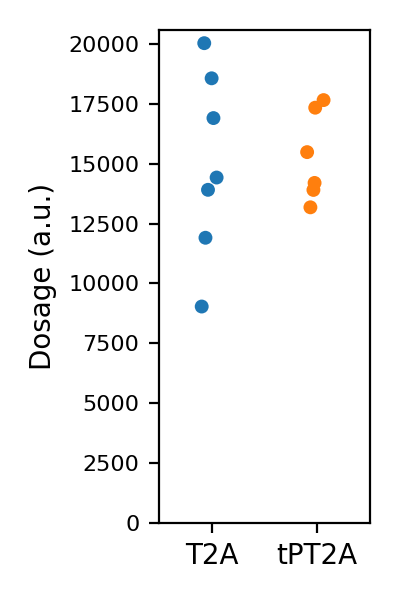

In [86]:
fig, ax = plt.subplots()
# sns.barplot(data=df, x='Label', y='Dosage', ax=ax, alpha=0.5)
sns.stripplot(data=df[df.Label != 'N2'], x='Label', y='Dosage', ax=ax)
# ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_ylabel('Dosage (a.u.)')
ax.set_xlabel('')
ax.set_ylim(bottom=0)
fig.set_size_inches(2,3)
fig.tight_layout()
fig.savefig('Figs/dosages.png', dpi=600, transparent=True)

### Images

In [75]:
p1 = df[df.Line == 'nwg347'].Path.tolist()[2]
img1 = rotated_embryo(load_image(glob.glob(p1 + '/*af_corrected*')[0]), roi=np.loadtxt(p1 + '/ROI.txt'), l=250, h=200)
p2 = df[df.Line == 'nwg378'].Path.tolist()[0]
img2 = rotated_embryo(load_image(glob.glob(p2 + '/*af_corrected*')[0]), roi=np.loadtxt(p2 + '/ROI.txt'), l=250, h=200)

# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.imshow(img1, cmap='gray', vmin=0, vmax=30000)
# ax1.axis('off')
# ax1.set_title('glh::T2A::Neon', fontsize=10)

# ax2.imshow(img2, cmap='gray', vmin=0, vmax=30000)
# ax2.axis('off')
# ax2.set_title('glh::P2A::T2A::Neon', fontsize=10)

# fig.set_size_inches(5, 2)
# fig.tight_layout()

In [79]:
# fig, (ax1, ax2) = plt.subplots(2, 1)
# ax1.imshow(img1, cmap='gray', vmin=0, vmax=30000)
# ax1.axis('off')
# # ax1.set_title('glh::T2A::Neon', fontsize=10)

# p = df[df.Line == 'nwg378'].Path.tolist()[0]
# ax2.imshow(img2, cmap='gray', vmin=0, vmax=30000)
# ax2.axis('off')
# # ax2.set_title('glh::P2A::T2A::Neon', fontsize=10)

# fig.set_size_inches(2, 3)
# fig.tight_layout()

### Zoomed in images

<IPython.core.display.Javascript object>


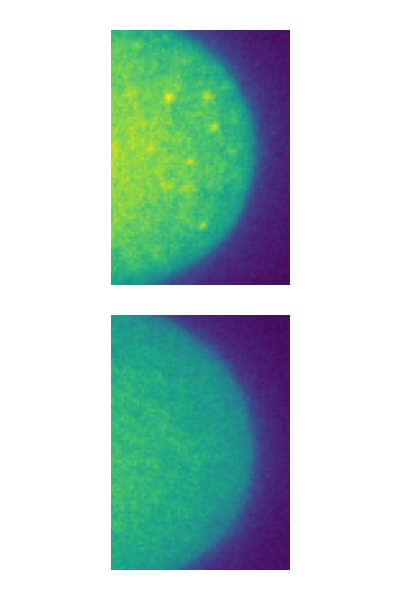

In [87]:
ybox = [170, 240]
xbox = [50, 150]

img1_box = img1[xbox[0]:xbox[1], ybox[0]:ybox[1]]
img2_box = img2[xbox[0]:xbox[1], ybox[0]:ybox[1]]

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(img1_box, vmin=0, vmax=25000)
ax1.axis('off')

ax2.imshow(img2_box, vmin=0, vmax=25000)
ax2.axis('off')

fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/images_zoomed.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


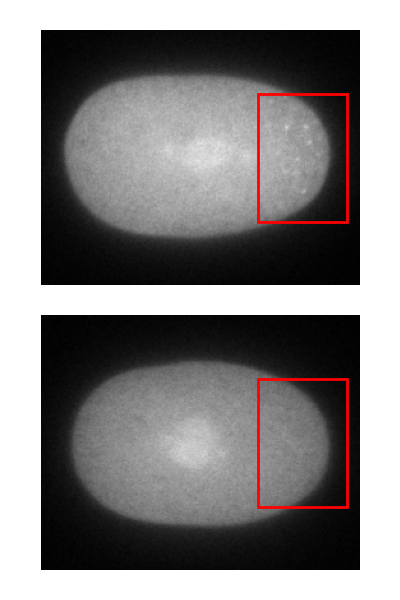

In [88]:
import matplotlib.patches as patches
rect1 = patches.Rectangle((ybox[0], xbox[0]), ybox[1] - ybox[0], xbox[1] - xbox[0], 
                         linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((ybox[0], xbox[0]), ybox[1] - ybox[0], xbox[1] - xbox[0], 
                         linewidth=1, edgecolor='r', facecolor='none')

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(img1, cmap='gray', vmin=0, vmax=30000)
ax1.add_patch(rect1)
ax1.axis('off')
# ax1.set_title('glh::T2A::Neon', fontsize=10)

p = df[df.Line == 'nwg378'].Path.tolist()[0]
ax2.imshow(img2, cmap='gray', vmin=0, vmax=30000)
ax2.add_patch(rect2)
ax2.axis('off')
# ax2.set_title('glh::P2A::T2A::Neon', fontsize=10)

fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/images.png', dpi=600, transparent=True)